---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

여름과 가을만 나왔어.

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('sbikedata.csv')
display(data)
len(data)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


5827

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 :

- 가설 3 :

- 가설 4 :

- 가설 5 :

- 가설 6 :

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

이용 시간대

In [4]:
def univariate(typ, var, data=data):
    display(data[var].info())
    print('*'*50)
    
    if typ == 'cat':    
        display(data[var].value_counts())
        print('*'*50)
        display(data[var].value_counts(normalize=True))
        print('*'*50)
        sns.countplot(x = var, data = data)
        plt.grid()
        plt.show()
    
    else:
        display(data[[var]].describe())
        print('*'*50)
        plt.hist(data[var])
        plt.grid()
        plt.show()
        plt.boxplot(data[var])
        plt.grid()
        plt.show()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


None

**************************************************


,hour
count,5827.000000
mean,11.506607
std,6.921963
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


**************************************************


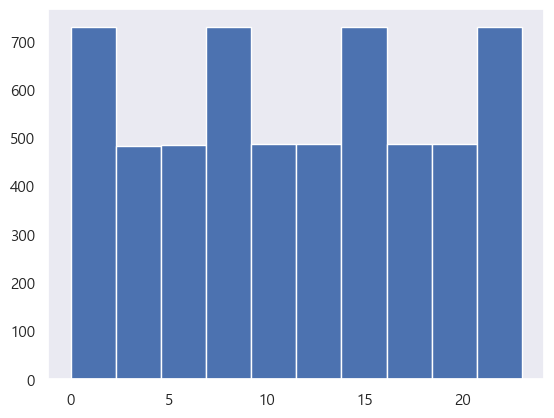

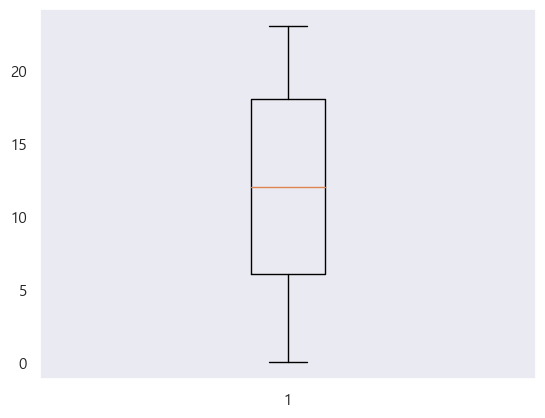

In [5]:
univariate('num','hour')

2. 변수가 수치형인지 범주형인지


수치형임

3. 변수의 결측치 존재 여부 및 조치방안

변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없음

4. 변수의 기초 통계량 확인

5. 변수의 분포 확인

6. 위 정보로 부터 파악한 내용 정리

In [6]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도

2. 변수가 수치형인지 범주형인지


In [8]:
#변수의 자료형을 확인해보세요.

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


None

**************************************************


,temperature
count,5827.000000
mean,19.376798
std,7.501572
min,-3.500000
25%,14.100000
50%,20.400000
75%,24.900000
max,36.300000


**************************************************


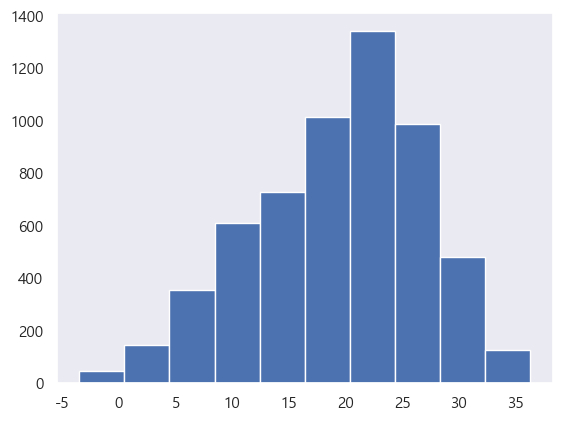

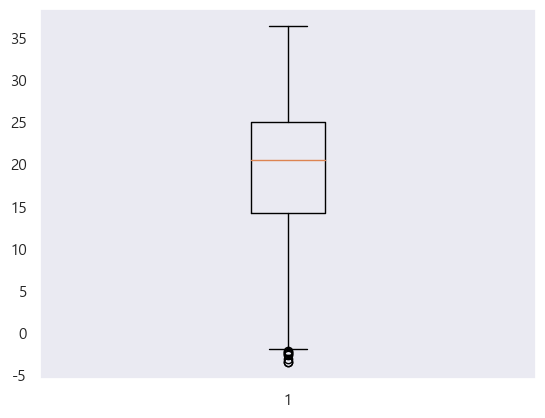

In [9]:
univariate('num','temperature')

3. 변수의 결측치 존재 여부 및 조치방안

In [10]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [11]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [12]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [13]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [14]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우 여부 (비가 오면 1)

2. 변수가 수치형인지 범주형인지


In [15]:
#변수의 자료형을 확인해보세요.

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


None

**************************************************


0    5387
1     440
Name: precipitation, dtype: int64

**************************************************


0    0.924489
1    0.075511
Name: precipitation, dtype: float64

**************************************************


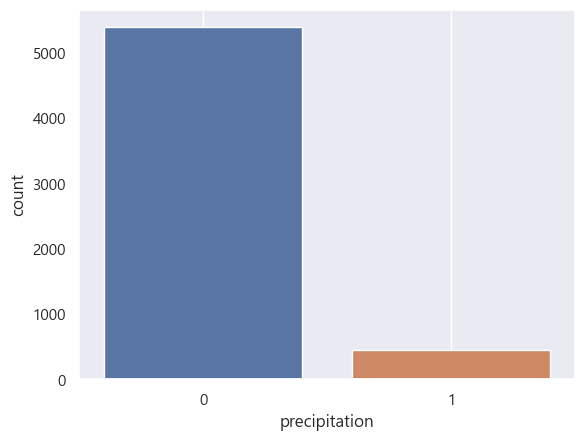

In [16]:
univariate('cat','precipitation')

3. 변수의 결측치 존재 여부 및 조치방안

In [17]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [18]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [19]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [20]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [21]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


None

**************************************************


,windspeed
count,5827.000000
mean,2.237601
std,1.054516
min,0.000000
25%,1.500000
50%,2.200000
75%,2.800000
max,8.300000


**************************************************


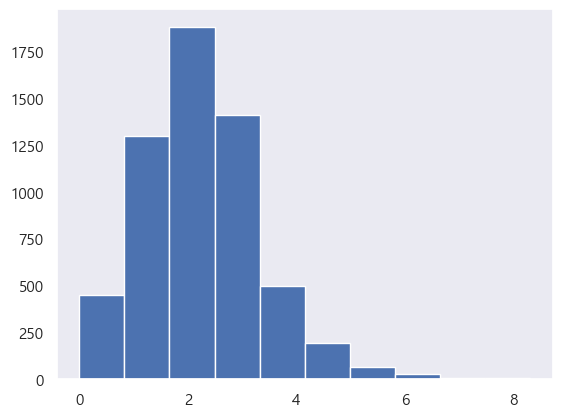

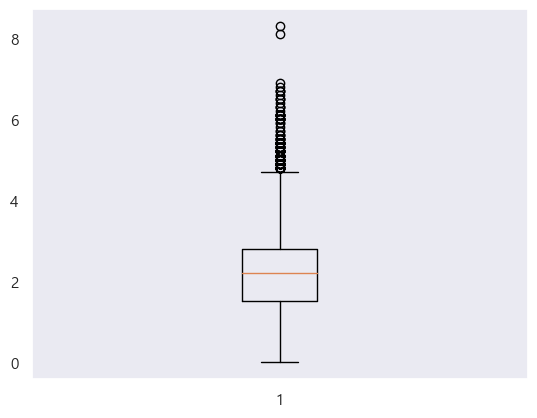

In [22]:
univariate('num','windspeed')

2. 변수가 수치형인지 범주형인지


In [23]:
#변수의 자료형을 확인해보세요.

수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [24]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [25]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [26]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [27]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [28]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


In [29]:
#변수의 자료형을 확인해보세요.

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


None

**************************************************


,humidity
count,5827.000000
mean,68.608718
std,17.277266
min,19.000000
25%,56.000000
50%,70.000000
75%,82.000000
max,100.000000


**************************************************


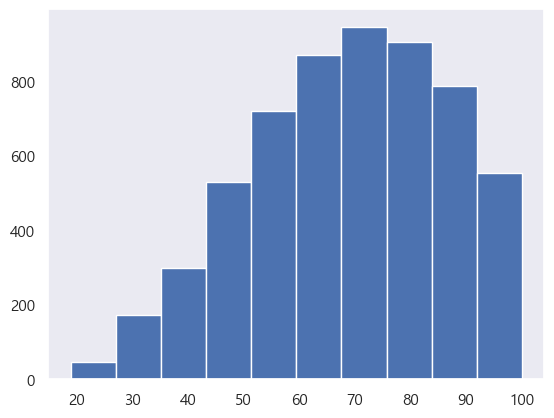

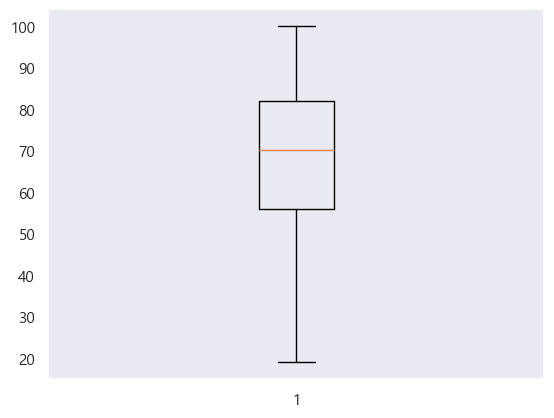

In [30]:
univariate('num', 'humidity')

3. 변수의 결측치 존재 여부 및 조치방안

In [31]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [32]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [33]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [34]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [35]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

가시거리

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


None

**************************************************


,visibility
count,5827.000000
mean,1758.438648
std,490.969394
min,60.000000
25%,1935.500000
50%,2000.000000
75%,2000.000000
max,2000.000000


**************************************************


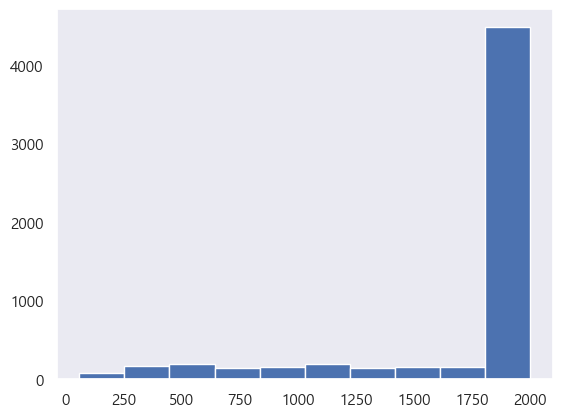

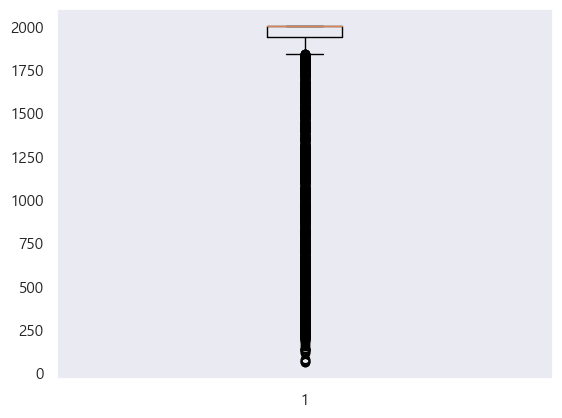

In [36]:
univariate('num', 'visibility')

In [37]:
data['visibility'].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

2000이 왜 이렇게 많지???


=> Visibility 값이 높으면 대기가 매우 맑다는 것을 의미하고, 낮으면 안개, 연기, 먼지 등으로 인해 시야가 제한되고 있다는 것을 의미합니다.

만약 "visibility" 열의 대부분의 값이 2000이라면, 이는 대체로 2000 미터(또는 해당하는 단위)까지 시야가 확보되어 있다는 것을 의미합니다. 

(array([ 75., 165., 189., 144., 145., 185., 139., 148., 146., 273.]),
 array([  60. ,  253.9,  447.8,  641.7,  835.6, 1029.5, 1223.4, 1417.3,
        1611.2, 1805.1, 1999. ]),
 <BarContainer object of 10 artists>)

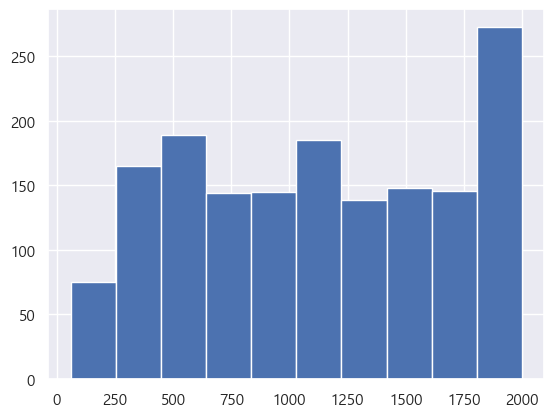

In [38]:
temp = data.loc[data['visibility'] != 2000, 'visibility']
plt.hist(temp)

2. 변수가 수치형인지 범주형인지


In [39]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [40]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [41]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [42]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [43]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [44]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존 수치, 높을수록 대기오염도가 높은 것임

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


None

**************************************************


,ozone
count,5699.000000
mean,0.031811
std,0.018277
min,0.001000
25%,0.019000
50%,0.031000
75%,0.041000
max,0.137000


**************************************************


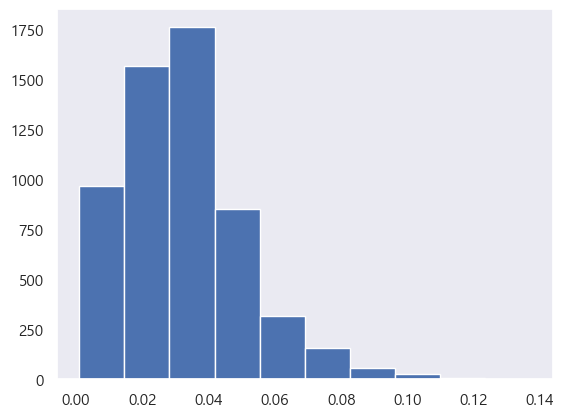

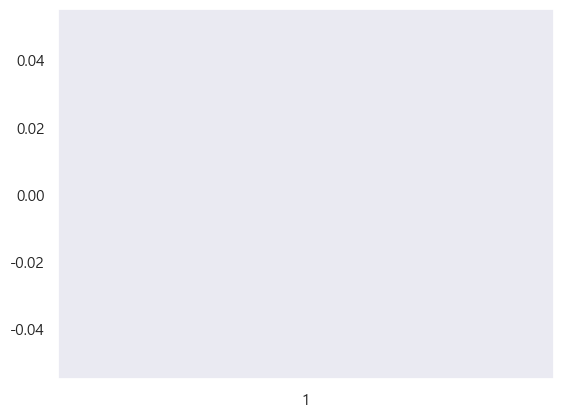

In [45]:
univariate('num', 'ozone')

2. 변수가 수치형인지 범주형인지


In [46]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [47]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측치 있음..

In [48]:
data['ozone'].isna().sum()

128

In [49]:
median = data.loc[~data['ozone'].isna(), 'ozone'].median()
median

0.031

In [50]:
data.loc[data['ozone'].isna(), 'ozone'] = median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


오존과 기온이 상관관계가 크다. (피어슨상관계수가 0.5정도)

4. 변수의 기초 통계량 확인

In [51]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [52]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [53]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [54]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [55]:
#변수의 자료형을 확인해보세요.

In [56]:
print(data['PM10'].isna().sum())

102


In [57]:
median = data['PM10'].median() # 같음. median = data.loc[~data['PM10'].isna(), 'PM10'].median() 
median 

25.0

In [58]:
data.loc[data['PM10'].isna(), 'PM10'] = median
data['PM10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


None

**************************************************


,PM10
count,5827.000000
mean,31.848636
std,42.619132
min,3.000000
25%,16.000000
50%,25.000000
75%,37.000000
max,827.000000


**************************************************


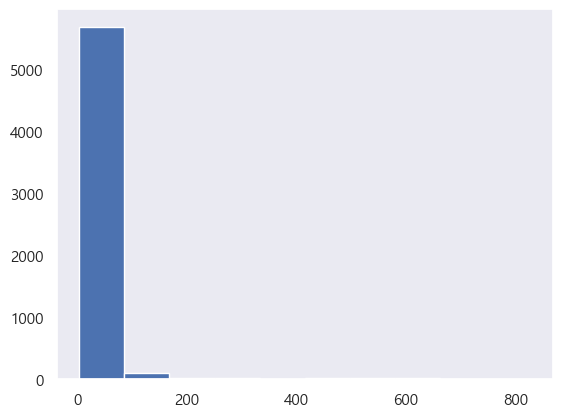

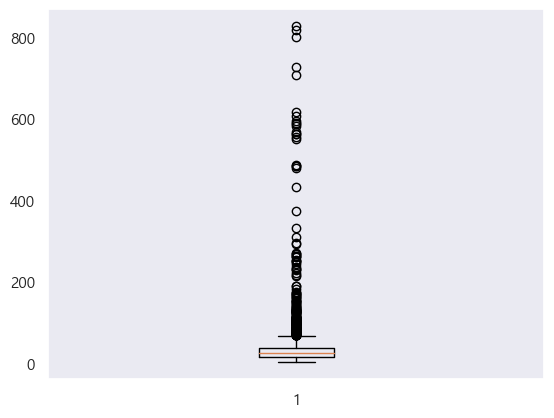

In [59]:
univariate('num', 'PM10')

날이 좋은 날만 있음. 데이터가 다양하지 않음.

In [60]:
data['PM10'].value_counts()

25.0     242
18.0     181
22.0     179
20.0     177
16.0     174
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 189, dtype: int64

In [61]:
result = data['PM10'].value_counts()
filtered_result = result[result > 1]
filtered_result

25.0     242
18.0     181
22.0     179
20.0     177
16.0     174
        ... 
97.0       2
126.0      2
100.0      2
88.0       2
87.0       2
Name: PM10, Length: 109, dtype: int64

(array([59.,  9.,  8.,  4., 10.,  7.,  5.,  6.,  0.,  1.]),
 array([  2.,  26.,  50.,  74.,  98., 122., 146., 170., 194., 218., 242.]),
 <BarContainer object of 10 artists>)

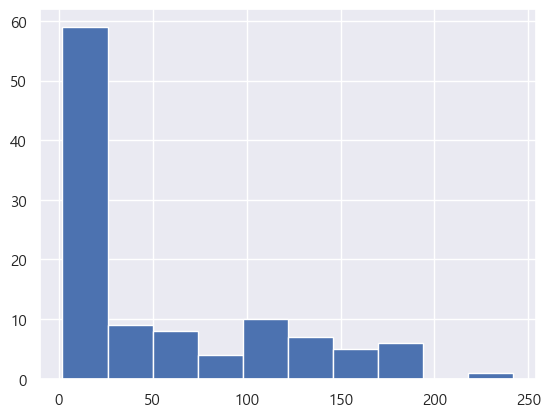

In [62]:
plt.hist(filtered_result)

3. 변수의 결측치 존재 여부 및 조치방안

In [63]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [64]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [65]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [66]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [67]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지 수치

In [68]:
print(data['PM2.5'].isna().sum())
median = data['PM2.5'].median() 
median 
data.loc[data['PM2.5'].isna(), 'PM2.5'] = median
data['PM2.5'].info()

95
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


None

**************************************************


,PM2.5
count,5827.000000
mean,15.623134
std,13.741748
min,1.000000
25%,7.000000
50%,13.000000
75%,20.000000
max,125.000000


**************************************************


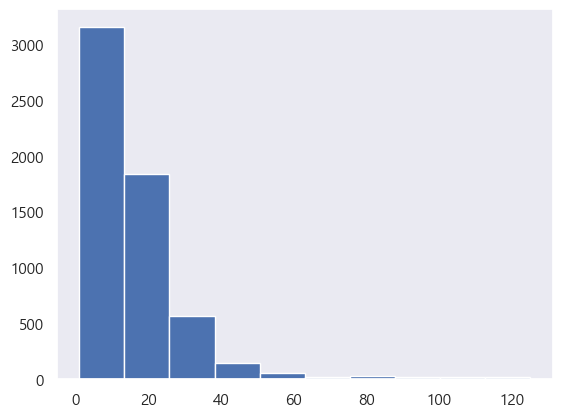

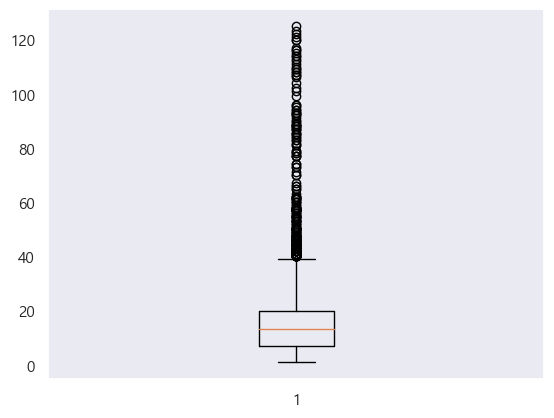

In [69]:
univariate('num', 'PM2.5')

In [70]:
data['PM2.5'].value_counts()

13.0     350
5.0      265
7.0      262
11.0     259
12.0     256
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: PM2.5, Length: 110, dtype: int64

In [71]:
result = data['PM10'].value_counts()
filtered_result = result[result > 1]
filtered_result

25.0     242
18.0     181
22.0     179
20.0     177
16.0     174
        ... 
97.0       2
126.0      2
100.0      2
88.0       2
87.0       2
Name: PM10, Length: 109, dtype: int64

2. 변수가 수치형인지 범주형인지


In [72]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [73]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [74]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [75]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [76]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [77]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시간에 따른 따릉이 대여수

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


None

**************************************************


,count
count,5827.000000
mean,215.117899
std,185.972900
min,1.000000
25%,53.000000
50%,186.000000
75%,315.000000
max,1746.000000


**************************************************


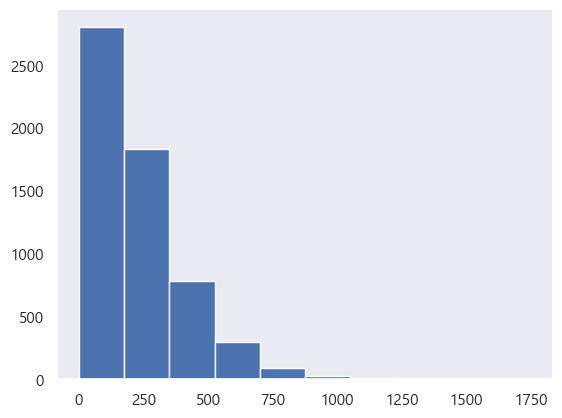

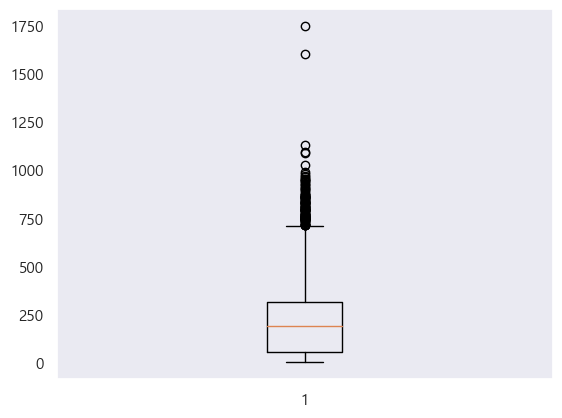

In [78]:
univariate('num', 'count')

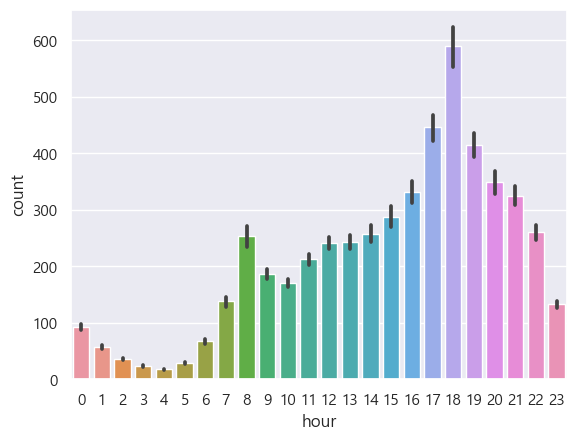

In [79]:
sorted_data = data.sort_values(by='hour', ascending=False)
sns.barplot(x='hour', y= 'count', data=sorted_data)
plt.show()

출퇴근 시간 이용자수가 많음

2. 변수가 수치형인지 범주형인지


In [80]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [81]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [82]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [83]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [84]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [85]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [86]:
import numpy as np
import scipy.stats as spst

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [87]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [88]:
np.where(data['precipitation'] ==1, 'rainy', 'sunny')

array(['sunny', 'sunny', 'sunny', ..., 'sunny', 'sunny', 'sunny'],
      dtype='<U5')

In [89]:
data['percipitation'] = np.where(data['precipitation'] ==1, 'rainy', 'sunny')

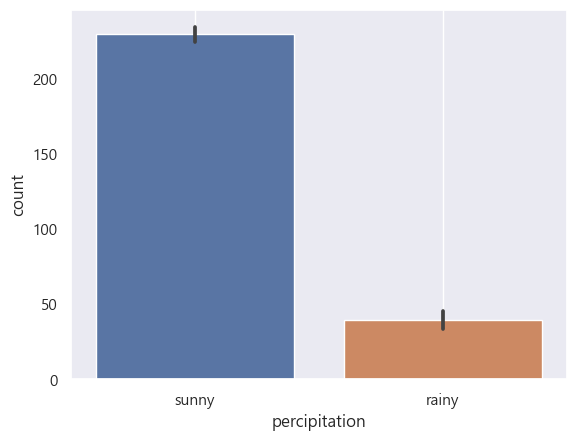

In [90]:
sns.barplot(x="percipitation", y="count", data=data)
plt.grid()
plt.show()

In [91]:
rainy = data.loc[data['percipitation']=='rainy', 'count']
sunny = data.loc[data['percipitation']=='sunny', 'count']
spst.ttest_ind(sunny, rainy)

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

관련이 매우 높음

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

In [92]:
def bivariate(var, target='count', data=data):
    sns.scatterplot(x=var ,y=target, data =data)
    plt.show()
    sns.regplot(x=var, y=target, data =data, line_kws={'color': 'orange'})
    plt.show()
    
    print('*'*80)
    display(spst.pearsonr(data[var], data[target]))

2. 시간대별 데이터와 따릉이 대여량간 분석

In [93]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

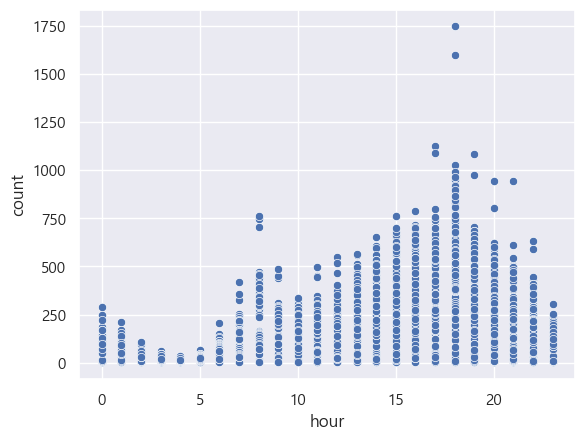

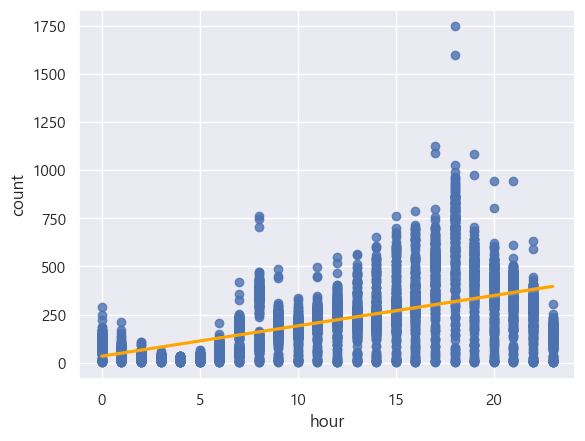

********************************************************************************


PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

In [94]:
bivariate('hour')

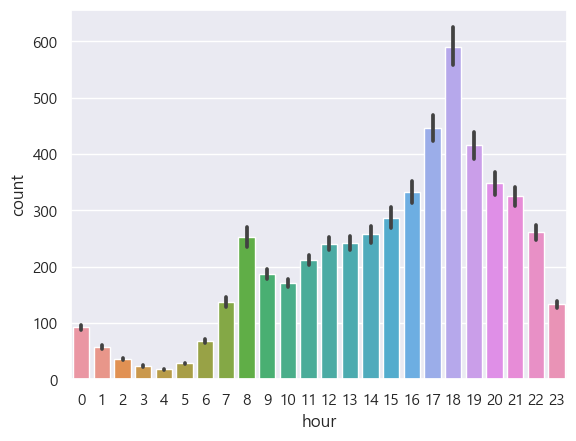

In [95]:
sorted_data = data.sort_values(by='hour', ascending=False)
sns.barplot(x='hour', y= 'count', data=sorted_data)
plt.show()

3. 온도 데이터와 따릉이 대여량간 분석

In [96]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

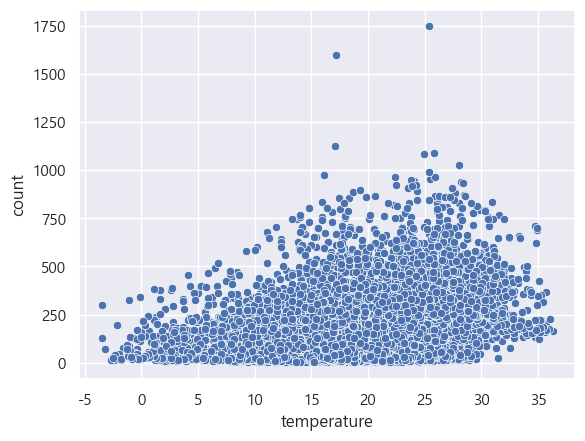

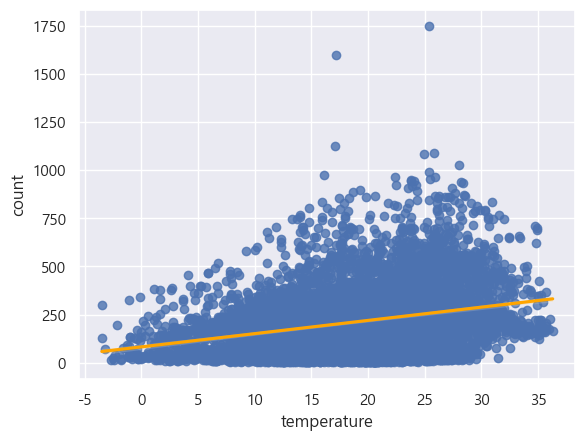

********************************************************************************


PearsonRResult(statistic=0.2771692363089791, pvalue=2.940516555113978e-103)

In [97]:
bivariate('temperature')

In [98]:
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

4. 풍속 데이터와 따릉이 대여량간 분석

In [99]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

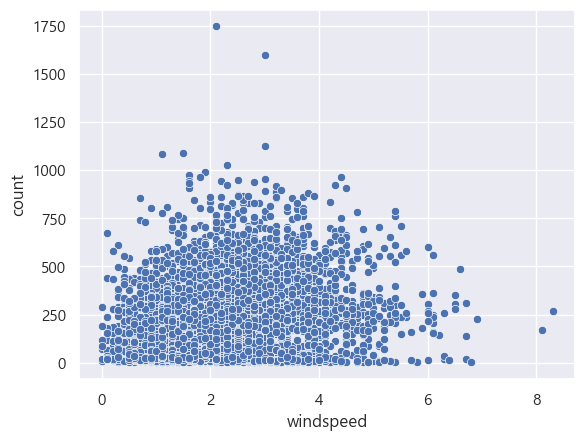

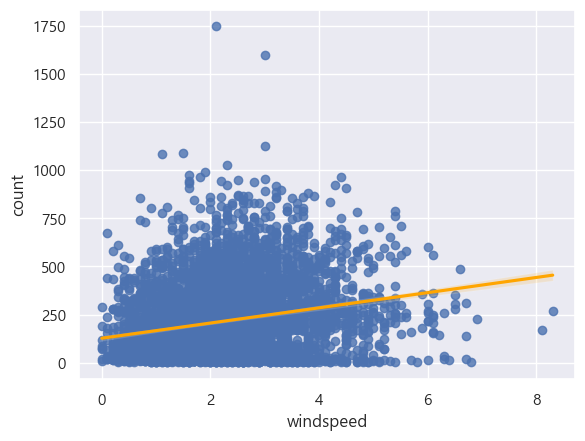

********************************************************************************


PearsonRResult(statistic=0.22372189900674888, pvalue=5.243317678213925e-67)

In [100]:
bivariate('windspeed')

5. 습도 데이터와 따릉이 대여량간 분석

In [101]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

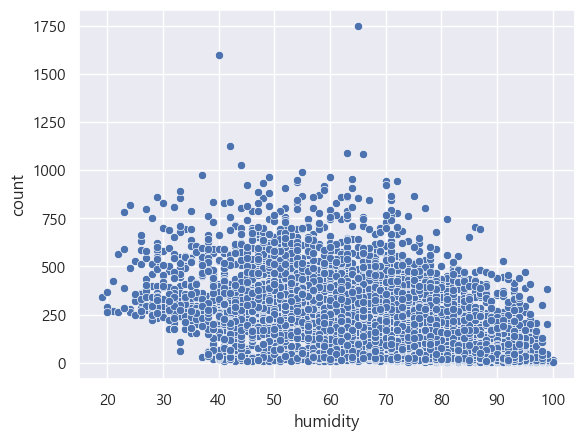

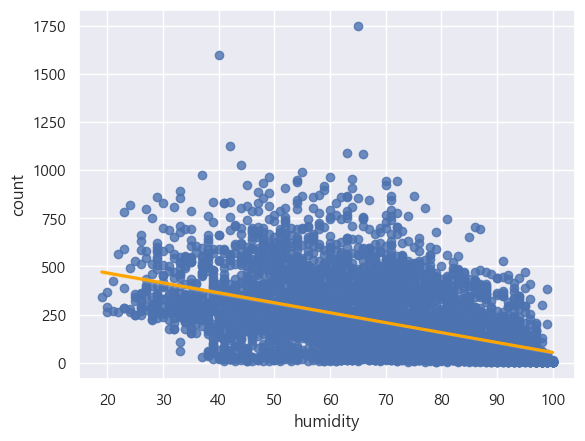

********************************************************************************


PearsonRResult(statistic=-0.4789554265904137, pvalue=0.0)

In [102]:
bivariate('humidity')

6. 시정 데이터와 따릉이 대여량간 분석

In [103]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

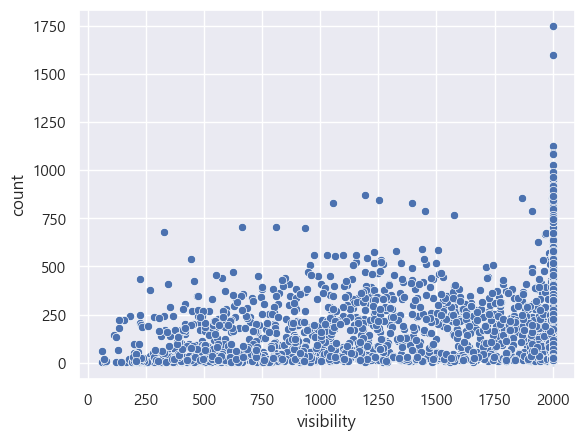

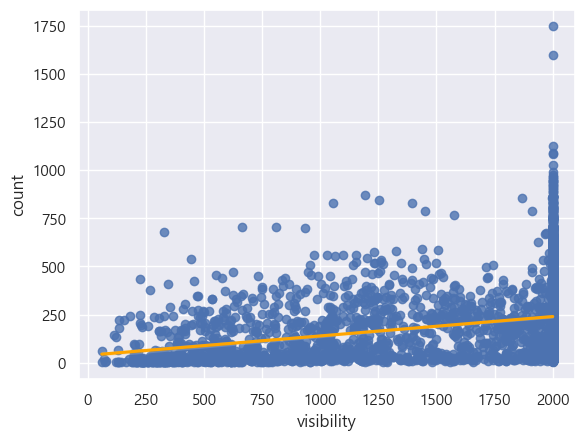

********************************************************************************


PearsonRResult(statistic=0.26582778327488765, pvalue=7.87600385276935e-95)

In [104]:
bivariate('visibility', 'count')

7. 오존 데이터와 따릉이 대여량간 분석

In [105]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

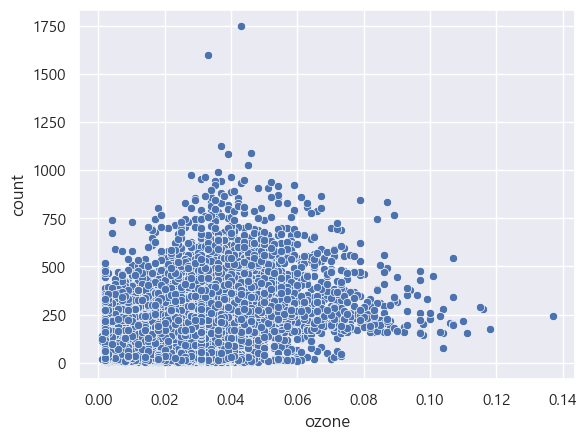

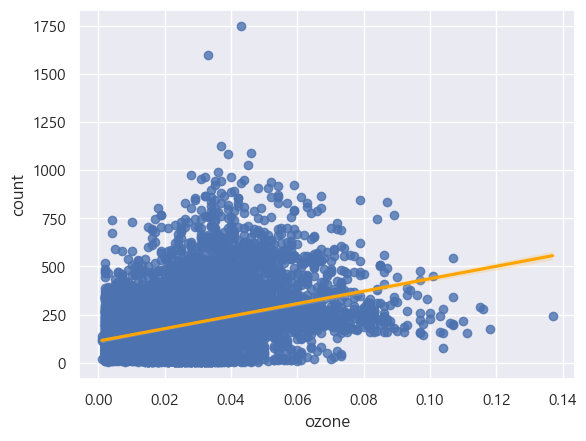

********************************************************************************


PearsonRResult(statistic=0.31453346787674397, pvalue=5.666600575566576e-134)

In [106]:
bivariate('ozone')

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [107]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

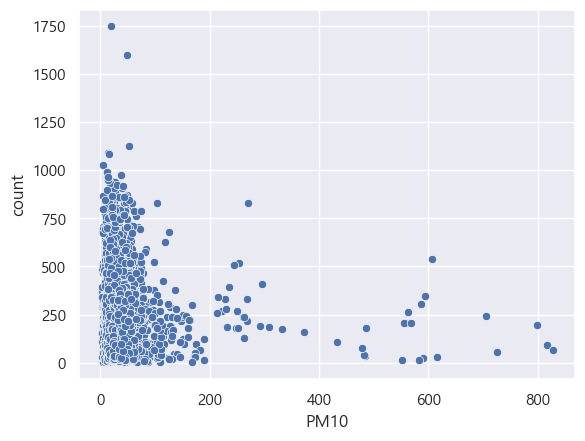

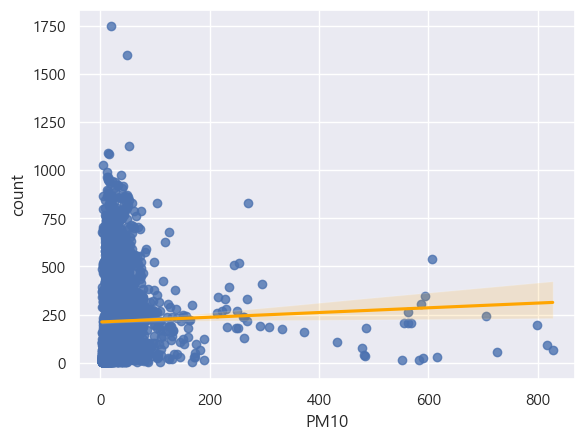

********************************************************************************


PearsonRResult(statistic=0.028147495329876437, pvalue=0.03166629421724746)

In [108]:
bivariate('PM10')

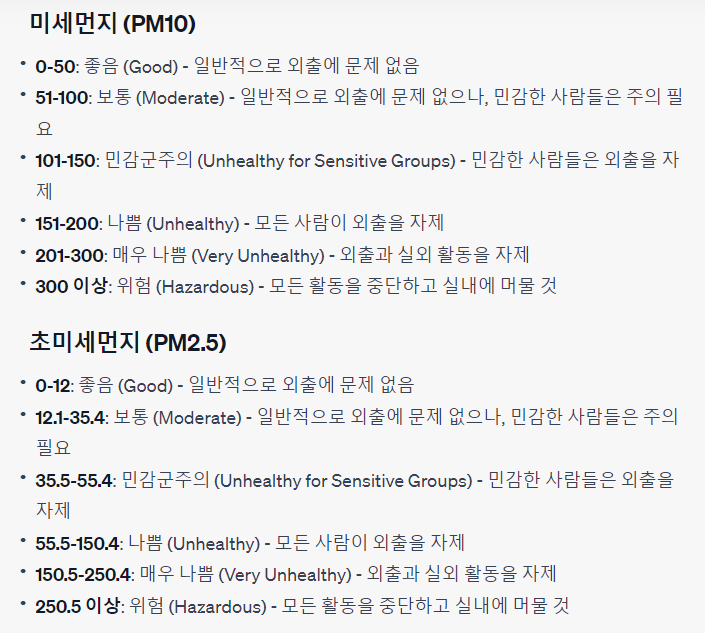

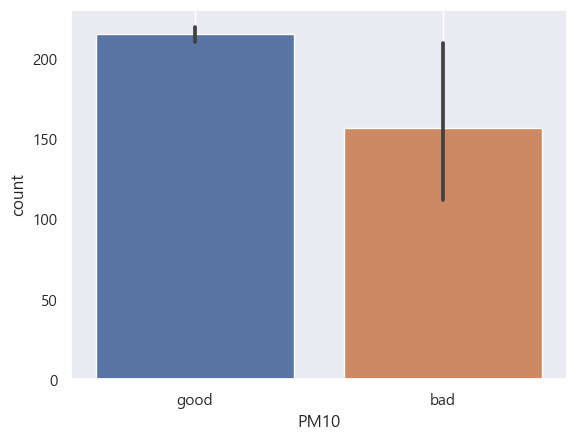

In [115]:
temp = data
temp['PM10'] = np.where(data['PM10']>300, 'bad', 'good')
temp
sns.barplot(x='PM10', y = 'count', data=temp)
plt.grid()

In [117]:
good = data.loc[data['PM10']=='good', 'count']
bad = data.loc[data['PM10']=='bad', 'count']
spst.ttest_ind(good, bad)

Ttest_indResult(statistic=1.5409106804103128, pvalue=0.12339284487429122)

상관관계 없음

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [109]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

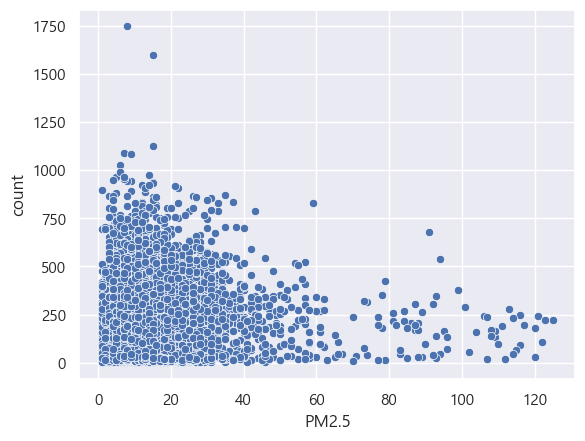

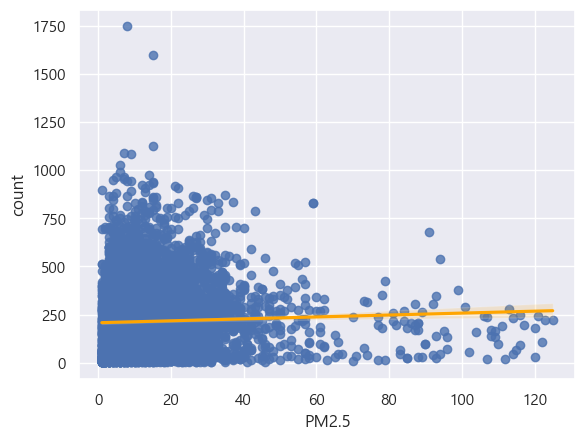

********************************************************************************


PearsonRResult(statistic=0.0369543440052327, pvalue=0.004783534919886874)

In [110]:
bivariate('PM2.5')

### [Step5] 가설 검정

C:\Users\user\AppData\Local\Temp\ipykernel_10972\2741725817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


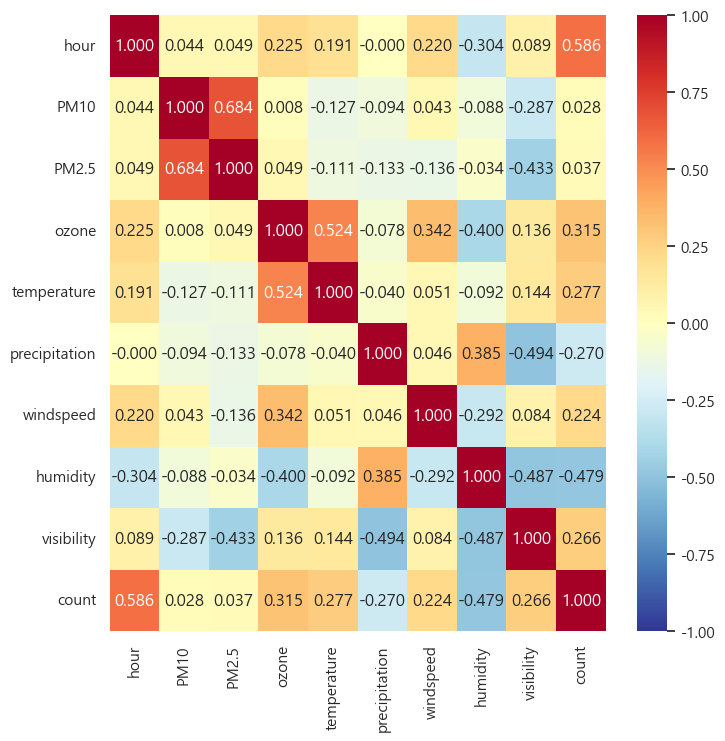

In [111]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

범주는 보지 않기

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강우량, 이용시간대 (hour), 습도(humidity) 와 가장 강한 관계이다.

#### <font color='green'>2. 약한 관계의 변수</font>


0.2까지?

오존 농도 (ozone), 온도(temperature), 강우(precipitation), 시계(visibility), 풍속(windspeed) 가 약한 관계이다.

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


미세먼지 수치 (PM10), 초미세먼지 수치(PM2.5)는 관계없는 변수이다.

### [Step6] Insight 도출

따릉이 이용은 이용시간대 특히, 출퇴근 시간대에 가장 많이 사용된다.

날씨 정보의 다양한 변수와는 약한 상관관계를 갖으며, 미세먼지 수치와는 거의 관계가 없다.